# 📊 COVID-19 India Data Analysis & Deaths Prediction

Welcome to this project where we will perform an in-depth **Exploratory Data Analysis (EDA)** on COVID-19 cases in India and then apply a **Linear Regression model** to predict future deaths.

We will visualize trends, patterns, and predictions with graphs and charts. Let's dive in! 🚀

## 🎯 Problem Statement

The COVID-19 pandemic has had a significant impact on India, with millions of confirmed cases and thousands of deaths across various states.  
The goal of this project is to analyze COVID-19 case and death trends across Indian states and build a machine learning model using **Linear Regression** to predict future death counts.  

Through **Exploratory Data Analysis (EDA)**, we aim to uncover hidden patterns in the data. Using a regression model, we will forecast death trends, helping to visualize the potential progression of the pandemic in the coming days.  

This analysis can help in understanding state-wise severity and future preparedness.

## 📄 Project Outline

- **Problem Statement:**  
  Analyze COVID-19 trends in India and predict future deaths using machine learning regression models.

- **Step 1: Importing Required Libraries**  
  Load all essential Python libraries like pandas, numpy, matplotlib, seaborn, and scikit-learn.

- **Step 2: Loading and Exploring the Dataset**  
  Load the COVID-19 India dataset and explore its structure — check dates, state-wise records, and null values.

- **Step 3: Exploratory Data Analysis (EDA) and Visualization**  
  Perform visual analysis using:
  - Bar charts (state-wise deaths)
  - Line charts (monthly death trends)
  - Pie charts (confirmed cases share)
  - Heatmaps (correlation between cases, deaths, and cured)

- **Step 4: Feature Engineering**  
  Create a new numeric feature: *Days Since First Case*, to be used for regression modeling.

- **Step 5: Linear Regression Model Building**  
  Use **scikit-learn** to build a Linear Regression model to predict total deaths based on time progression.

- **Step 6: Model Evaluation**  
  Evaluate the model using Root Mean Squared Error (RMSE) to check its performance.

- **Step 7: Future Deaths Prediction**  
  Use the trained model to predict total deaths for the next 30 days and visualize predictions.

- **Step 8: Insights and Conclusion**  
  Summarize findings, trends, and model performance with a conclusion.

## Step 1: Import Libraries
In this step, we will import all necessary Python libraries for our analysis:
- **Pandas & Numpy**: For data handling and numerical operations
- **Matplotlib & Seaborn**: For data visualization
- **Scikit-learn**: For building and evaluating our regression model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Optional: Show all rows in tables
pd.set_option('display.max_rows', None)


## Step 2: Load the COVID-19 Dataset
We will load our dataset containing daily COVID-19 records for different states in India. 

We will also convert the 'Date' column to a datetime format so that we can easily analyze trends over time.

In [2]:

# Load the dataset
data = pd.read_csv('covid_19_india.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


## Step 3: 🕵️ Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA)** helps us understand the structure and patterns in the data.

### 3.1 State-wise Total Cases & Deaths
Let's first analyze **total confirmed cases, deaths, and recoveries** across different states in India.

In [3]:

latest_data = data[data['Date'] == data['Date'].max()]
statewise = latest_data.groupby('State/UnionTerritory').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Cured': 'sum'
}).reset_index()
statewise  # Show all states


,State/UnionTerritory,Confirmed,Deaths,Cured
0,Andaman and Nicobar Islands,7548,129,7412
1,Andhra Pradesh,1985182,13564,1952736
2,Arunachal Pradesh,50605,248,47821
3,Assam,576149,5420,559684
4,Bihar,725279,9646,715352
5,Chandigarh,61992,811,61150
6,Chhattisgarh,1003356,13544,988189
7,Dadra and Nagar Haveli and Daman and Diu,10654,4,10646
8,Delhi,1436852,25068,1411280
9,Goa,172085,3164,167978


### 3.2 📊 Bar Chart: Deaths State-wise
We will visualize state-wise deaths using a horizontal bar chart. This helps us quickly identify the states with the highest number of deaths.

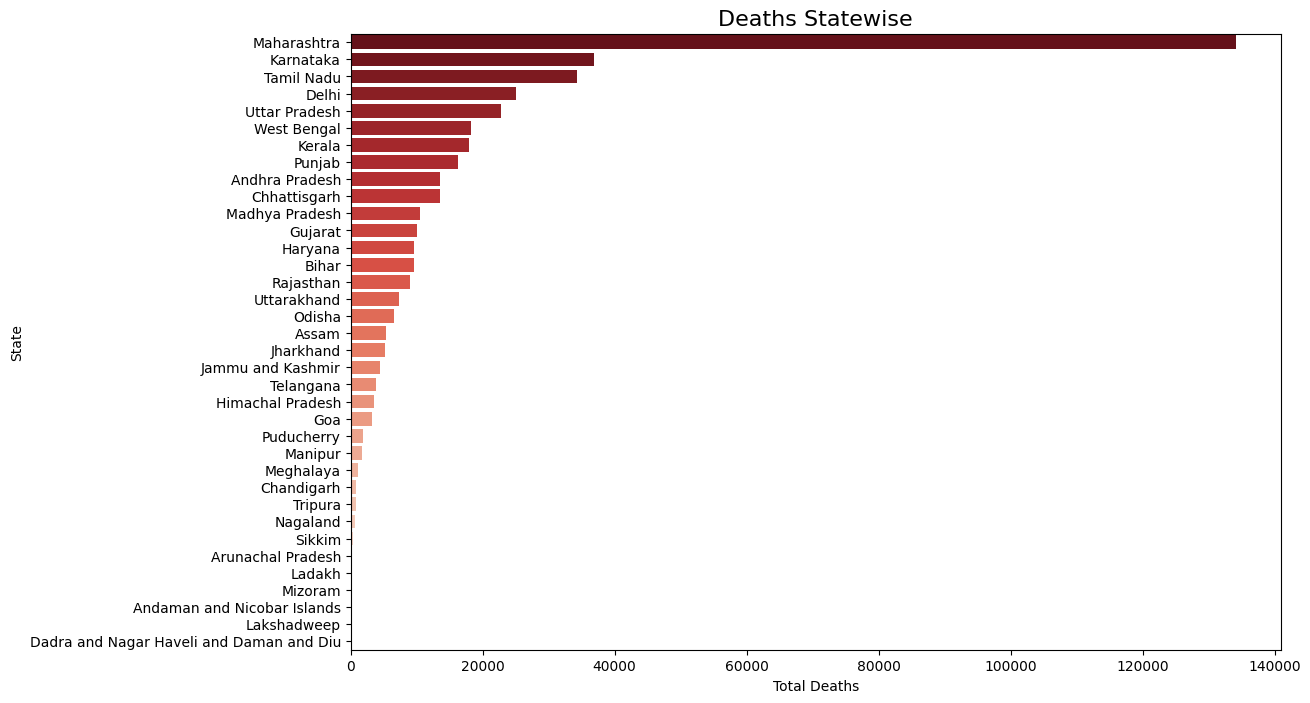

In [4]:

plt.figure(figsize=(12,8))
sns.barplot(x='Deaths', y='State/UnionTerritory', hue='State/UnionTerritory',
            data=statewise.sort_values(by='Deaths', ascending=False),
            dodge=False, palette='Reds_r', legend=False)
plt.title('Deaths Statewise', fontsize=16)
plt.xlabel('Total Deaths')
plt.ylabel('State')
plt.show()


### 3.3 📈 Monthly Deaths Trend
We will now plot a **time-series line chart** showing how deaths have changed over months.
This trend graph will help us see peak periods and declining phases.

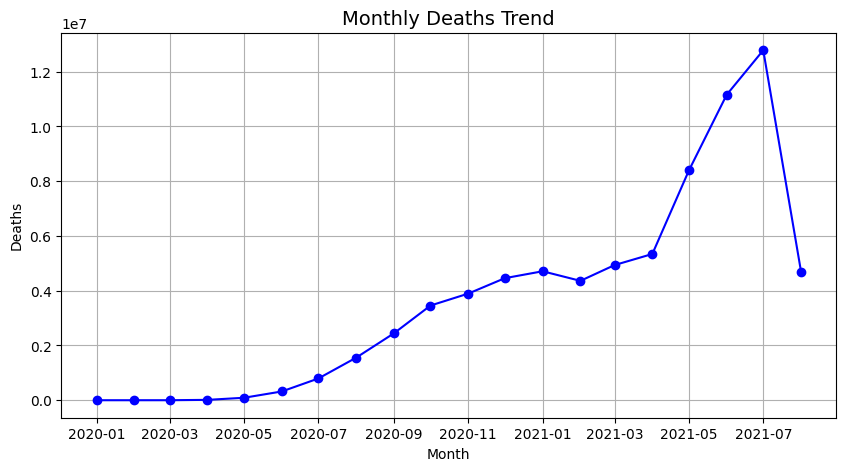

In [5]:

monthly = data.groupby(data['Date'].dt.to_period('M')).agg({'Deaths': 'sum'}).reset_index()
monthly['Date'] = monthly['Date'].dt.to_timestamp()

plt.figure(figsize=(10,5))
plt.plot(monthly['Date'], monthly['Deaths'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Deaths Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Deaths')
plt.grid(True)
plt.show()


### 3.4 🥧 Pie Chart: Statewise Share of Confirmed Cases
This pie chart shows what **percentage** each state contributes to the total confirmed cases in India. A great way to visualize shares and proportions.

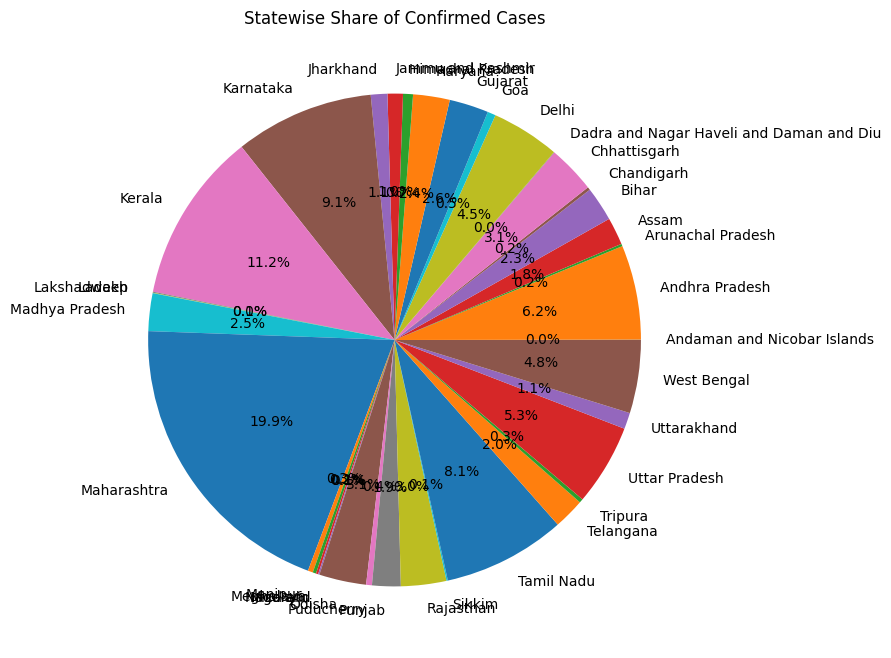

In [6]:

plt.figure(figsize=(8,8))
plt.pie(statewise['Confirmed'], labels=statewise['State/UnionTerritory'], autopct='%1.1f%%')
plt.title('Statewise Share of Confirmed Cases')
plt.show()


### 3.5 🔥 Heatmap: Correlation Between Confirmed, Deaths, and Cured Cases
Heatmaps show us the **correlation** (relationship) between numeric columns.
For example, we might expect that higher confirmed cases lead to higher deaths and recoveries.

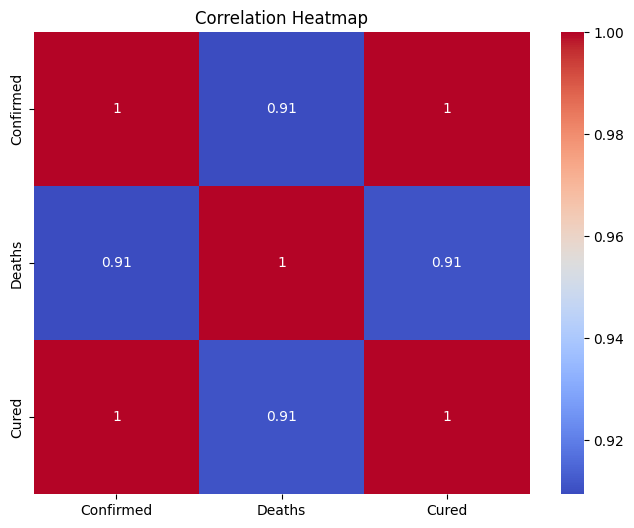

In [7]:

# Exclude non-numeric columns before calculating the correlation matrix
numeric_statewise = statewise.select_dtypes(include=[np.number])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_statewise.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Step 4: 🤖 Linear Regression Model to Predict Deaths

Now we will build a **Linear Regression** model to predict total deaths.

**Linear Regression** is a machine learning algorithm that finds a straight line which best fits the data. 
We will train it to predict future deaths based on the number of days since the first case.

In [8]:

# Group total deaths by date
daily_deaths = data.groupby('Date')['Deaths'].sum().reset_index()

# Create feature: Days since first record
daily_deaths['Days_Since'] = (daily_deaths['Date'] - daily_deaths['Date'].min()).dt.days

# Features and target
X = daily_deaths[['Days_Since']]
y = daily_deaths['Deaths']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse:.2f}')


Root Mean Squared Error: 45583.26


## Step 5: 🔮 Predicting Future Deaths

We will now predict deaths for the **next 30 days** using our trained model.

In the graph below:
- 🔵 Blue dots = actual deaths data
- 🔴 Red line = regression model fit
- 🟢 Green dashed line = future predictions

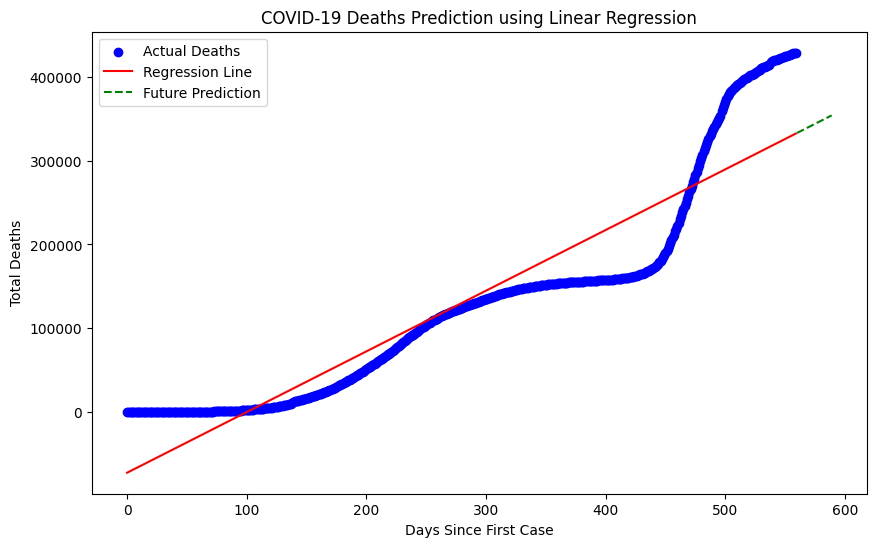

In [9]:

# Predict future deaths (next 30 days)
future_days_array = np.arange(daily_deaths['Days_Since'].max() + 1, daily_deaths['Days_Since'].max() + 31).reshape(-1, 1)
future_days = pd.DataFrame(future_days_array, columns=['Days_Since'])  # Fix warning by using column name
future_deaths = model.predict(future_days)

# Plot actual vs predicted deaths
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Actual Deaths')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.plot(future_days, future_deaths, color='green', linestyle='--', label='Future Prediction')
plt.xlabel('Days Since First Case')
plt.ylabel('Total Deaths')
plt.title('COVID-19 Deaths Prediction using Linear Regression')
plt.legend()
plt.show()
